In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
a=pd.read_excel("removed3.xlsx")

In [3]:
a

,rating,Reviews
0,5,Very high quality and beautiful Amazon is more...
1,5,The product is really excellent although it re...
2,5,Price is a very good choice in terms of perfor...
3,5,Thanks to Amazon Turkey before the product I g...
4,5,I got it very quickly It was very well preserv...
...,...,...
13074,4,Good price and quality
13075,5,It is an excellent product It arrived complete...
13076,5,Team fully sealed and in perfect condition rec...
13077,5,I loved it better cost benefit


In [4]:
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

In [5]:
a["sentiment"]=a["Reviews"].apply(lambda x: TextBlob(str(x).lower()).sentiment.polarity) 

In [6]:
a

,rating,Reviews,sentiment
0,5,Very high quality and beautiful Amazon is more...,0.519333
1,5,The product is really excellent although it re...,0.600000
2,5,Price is a very good choice in terms of perfor...,0.408542
3,5,Thanks to Amazon Turkey before the product I g...,0.600000
4,5,I got it very quickly It was very well preserv...,0.316667
...,...,...,...
13074,4,Good price and quality,0.700000
13075,5,It is an excellent product It arrived complete...,0.449074
13076,5,Team fully sealed and in perfect condition rec...,1.000000
13077,5,I loved it better cost benefit,0.600000


In [7]:
for i in a["sentiment"]:
    if i <0:
        a["sentiment"].replace(to_replace=i,value="0",inplace=True)
    elif i>0:
        a["sentiment"].replace(to_replace=i,value="1",inplace=True)
    else:
        a["sentiment"].replace(to_replace=i,value="neutral",inplace=True)

In [8]:
a

,rating,Reviews,sentiment
0,5,Very high quality and beautiful Amazon is more...,1
1,5,The product is really excellent although it re...,1
2,5,Price is a very good choice in terms of perfor...,1
3,5,Thanks to Amazon Turkey before the product I g...,1
4,5,I got it very quickly It was very well preserv...,1
...,...,...,...
13074,4,Good price and quality,1
13075,5,It is an excellent product It arrived complete...,1
13076,5,Team fully sealed and in perfect condition rec...,1
13077,5,I loved it better cost benefit,1


In [9]:
a["sentiment"].value_counts()

1          11615
neutral      850
0            614
Name: sentiment, dtype: int64

<AxesSubplot: >

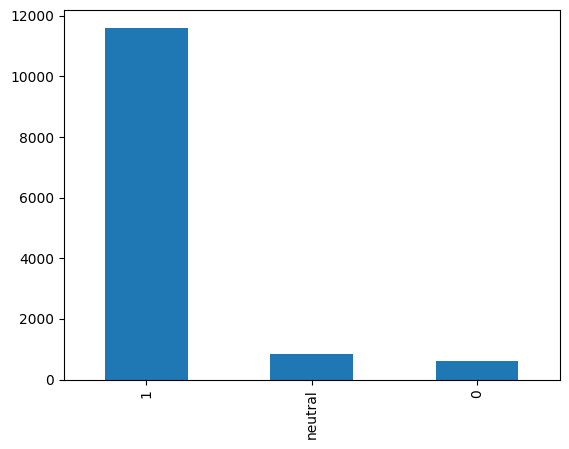

In [10]:
a["sentiment"].value_counts().plot(kind="bar")

In [11]:
a.to_excel("datas2.xlsx")